<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drve')

Mounted at /content/drve


In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from __future__ import print_function
import sys

# for number 5
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

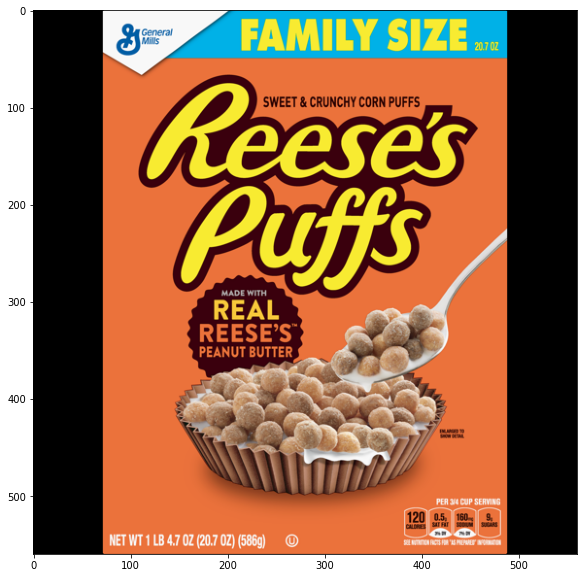

In [ ]:
def display(img, cmap='gray'):
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
reeses = cv.imread('/content/drve/MyDrive/PCVK/Images/reeses_puffs.png')
display(reeses)

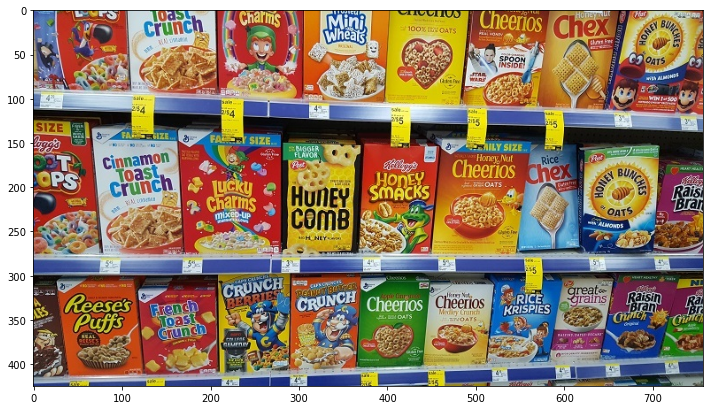

In [ ]:
cereals= cv.imread('/content/drve/MyDrive/PCVK/Images/many_cereals.jpg')
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

47.0

In [ ]:
len(matches)

140

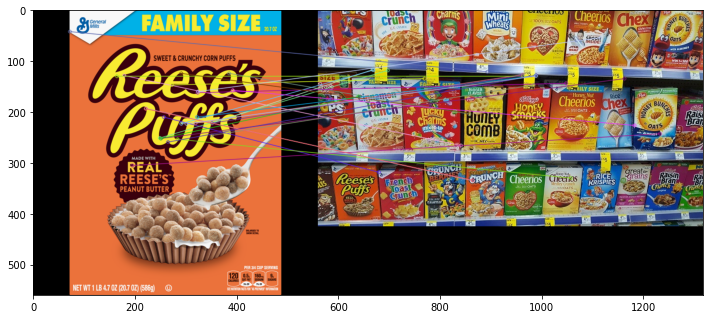

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
# !pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 71kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# ratio match < 75% Match2
for match1,match2 in matches:
  # jika jarak match1 lebih kecil dari jarak 75% match2
  # descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

77

In [ ]:
len(matches)

1501

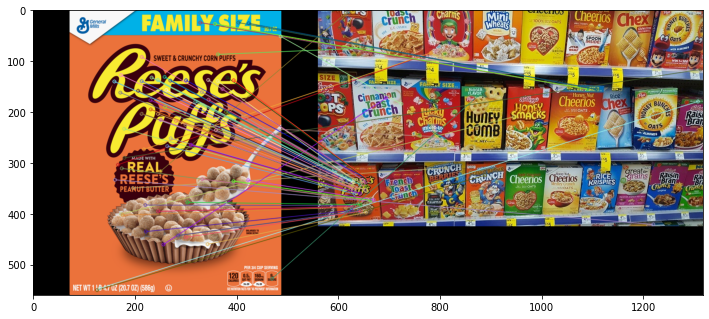

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals,kp2, good, None,flags=2)
display(sift_matches)

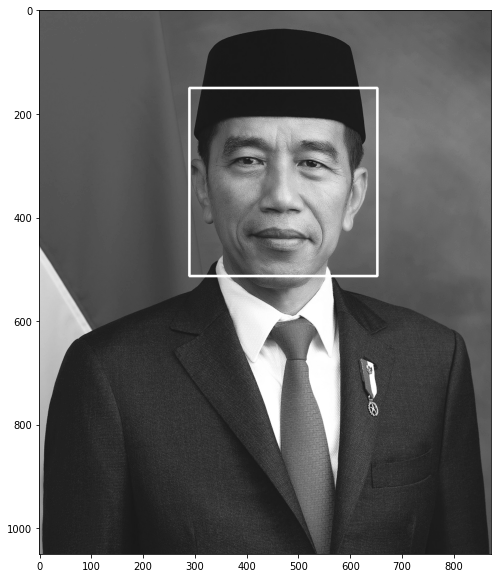

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drve/MyDrive/PCVK/Images/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

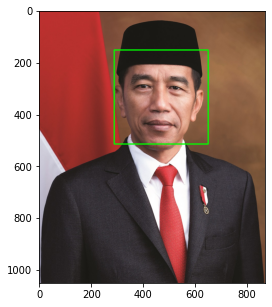

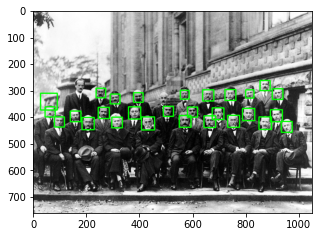

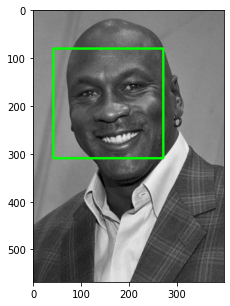

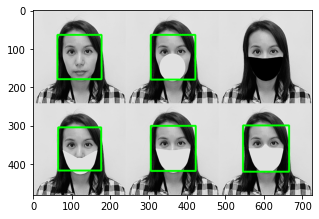

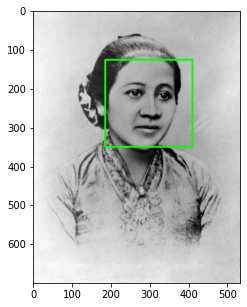

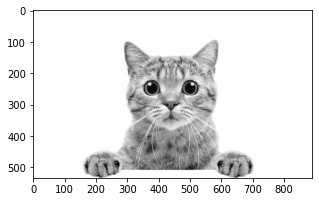

In [ ]:
# number 1

# cascade set
cascade_wajah = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

# importing images
jokowi = cv.imread('/content/drve/MyDrive/PCVK/Images/jokowi.jpg')
faces=(
  cv.imread('/content/drve/MyDrive/PCVK/Images/solvayconf.jpg'),
  cv.imread('/content/drve/MyDrive/PCVK/Images/mjordan.jpg'),
  cv.imread('/content/drve/MyDrive/PCVK/Images/mask.png'),
  cv.imread('/content/drve/MyDrive/PCVK/Images/kartini.jpg'),
  cv.imread('/content/drve/MyDrive/PCVK/Images/kucing.jpg')
)

# jokowi face detection
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (5,5))
plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB), cmap='gray')

# other faces detection
for face in faces:
  face_tmp = cv.cvtColor(face, cv.COLOR_BGR2GRAY)
  face_tmp = cv.cvtColor(face_tmp, cv.COLOR_GRAY2BGR)
  roi_wajah = cascade_wajah.detectMultiScale(face_tmp)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(face_tmp,(x,y),(x+w,y+h),(0,255,0),3)
  plt.figure(figsize = (5,5))
  plt.imshow(face_tmp, cmap='gray')

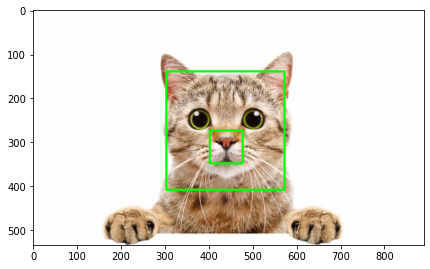

In [ ]:
# number 2
cascade_wajah = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface_extended.xml')
kucing = cv.imread('/content/drve/MyDrive/PCVK/Images/kucing.jpg')
kucing_gray = cv.cvtColor(kucing, cv.COLOR_BGR2GRAY)
roi_wajah = cascade_wajah.detectMultiScale(kucing_gray, scaleFactor=1.05, minNeighbors=5)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(kucing,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (7,7))
plt.imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB), cmap='gray')

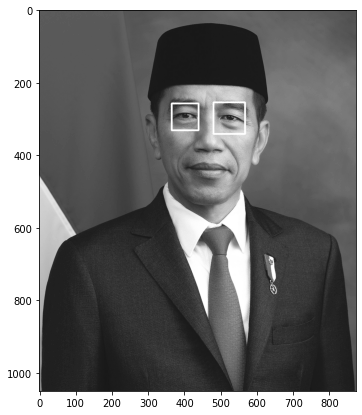

In [ ]:
# number 3
cascade_eye = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_eye.xml')
jokowi = cv.imread('/content/drve/MyDrive/PCVK/Images/jokowi.jpg',0)
roi_wajah = cascade_eye.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (7,7))
plt.imshow(jokowi, cmap='gray')

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


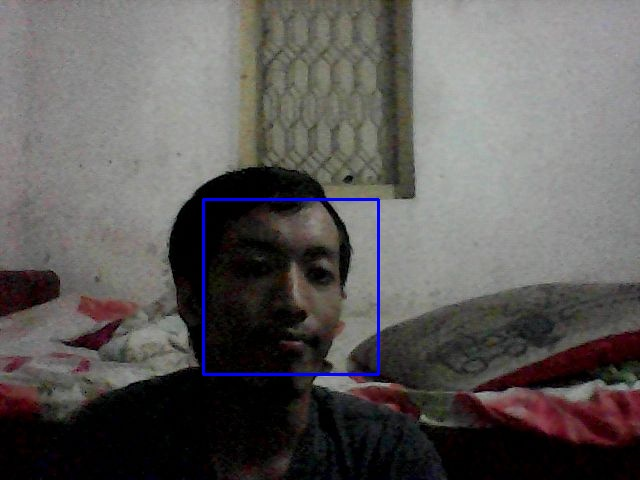

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  # with open(filename, 'wb') as f:
  #   f.write(binary)
  img_np = cv.imdecode(np.frombuffer(binary, dtype=np.uint8), flags=1)
  face_cascade = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
  gray = cv.cvtColor(img_np, cv.COLOR_BGR2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for (x,y,w,h) in faces:
    img = cv.rectangle(img_np,(x,y),(x+w,y+h),(255,0,0),2)
  cv.imwrite(filename, img)
  return filename

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [19]:
face_cascade = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

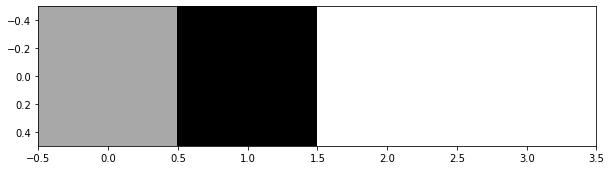

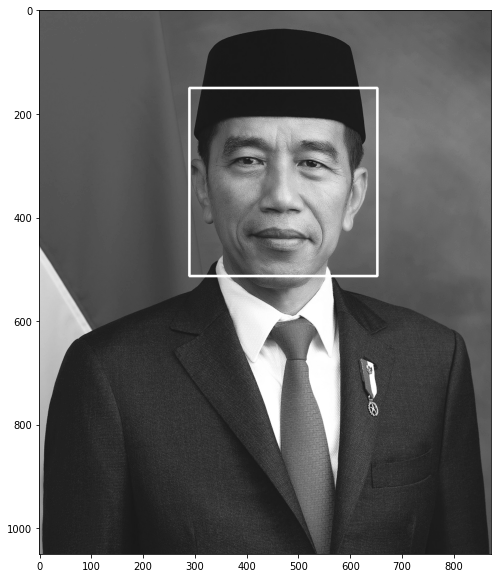

In [30]:
cascade_wajah = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drve/MyDrive/PCVK/Images/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
plt.figure(figsize = (10,10))
plt.imshow(roi_wajah, cmap='gray')
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

239  and  71


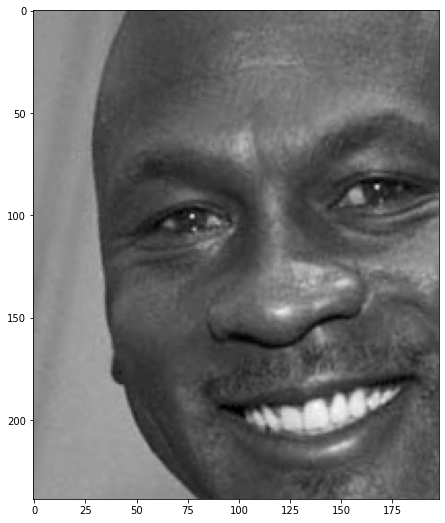

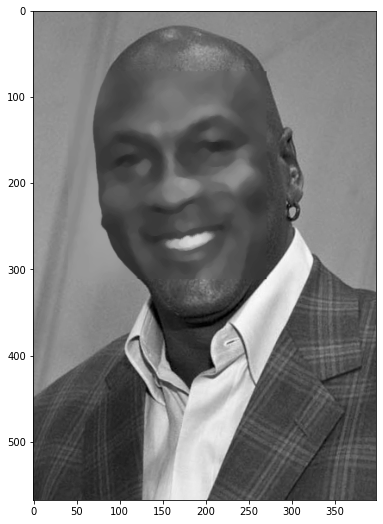

In [111]:
image = cv.imread('/content/drve/MyDrive/PCVK/Images/mjordan.jpg')
result_image = image.copy()
result_image = cv.cvtColor(result_image, cv.COLOR_BGR2GRAY)

face_cascade = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

#Preprocess the image
grayimg = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
grayimg = cv.equalizeHist(grayimg)

#Run the classifiers
# faces = face_cascade.detectMultiScale(grayimg, 1.1, 2, 0|cv.CASCADE_SCALE_IMAGE, (30, 30))
faces = face_cascade.detectMultiScale(grayimg)

if len(faces) != 0:         # If there are faces in the images
    for f in faces:         # For each face in the image

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = f

        # check the face location
        plt.figure(figsize=(9,9))
        print(h,' and ',y)
        plt.imshow(result_image[y:h+y, x:w], cmap='gray')

        # get the selected face from the result_image
        sub_face = result_image[y:y+h+2, x:x+w-9]
        # apply a blur effect on this new face image
        # sub_face = cv.GaussianBlur(sub_face,(23, 23), 30)
        for z in range(15):
          sub_face = cv.medianBlur(sub_face, 5)
        
        # merge this blurry rectangle to our final image
        result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face

plt.figure(figsize=(9,9))
plt.imshow(result_image, cmap='gray')